In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

In [3]:
import os
dataframes1=[]
ruta_data = "D:\Documentos\IT\Github\Projects\Projects\Personal Projects\Generacion electrica en Colombia\Data"  # Cambia esta ruta por la ubicación de tu carpeta "data"
for archivo in os.listdir(ruta_data):
    if archivo.endswith(".xlsx"):  # Solo carga archivos Excel
        ruta_completa = os.path.join(ruta_data, archivo)
        
        # Lee las primeras filas del archivo para encontrar la fila que contiene "Fecha"
        encontrado = False
        for i in range(10):  # Puedes ajustar el rango según cuántas filas quieras buscar
            df_temp = pd.read_excel(ruta_completa, header=i)
            if "Fecha" in df_temp.columns:
                df = pd.read_excel(ruta_completa, header=i)
                encontrado = True
                break
        
        if not encontrado:
            # Si no se encuentra "Fecha" en las primeras 10 filas, usa la tercera fila como encabezado predeterminado
            df = pd.read_excel(ruta_completa, header=2)
            
        dataframes1.append(df)

KeyboardInterrupt: 

# Evolucion del la generacion electrica en el pais entre los años 1995 y 2022

## Determinacion del total generado por cada planta

In [30]:
modified_dataframes=[]
for dataframe in range(len(dataframes1)):
    #if dataframe ==2:
     #   break
    dfcopy=dataframes1[dataframe].copy()
    if "Version" in dfcopy.columns:
        dfcopy=dfcopy.drop(columns=["Fecha","Version"])
    else:
        dfcopy=dfcopy.drop(columns=["Fecha"])
    try:  
        dfcopy=dfcopy.groupby(dfcopy.columns[:dfcopy.columns.get_loc("0")].tolist()).sum()
    except:
        dfcopy=dfcopy.groupby(dfcopy.columns[:dfcopy.columns.get_loc(0)].tolist()).sum()
    dfcopy["Total"]=dfcopy[dfcopy.columns].sum(axis=1)
    #print(f'the GWH generation of {year} is {dfcopy["Total"].sum()/1000000}')
    modified_dataframes.append(dfcopy)
    

## Total generado para cada año en GWH

In [32]:

years=[]
generation=[]
df=pd.DataFrame(columns=["Year","Generation(GWH)"])
for dataframe in range(len(modified_dataframes)):
    try:
        print(dataframes1[dataframe]["Fecha"].iloc[0].year,":", modified_dataframes[dataframe]["Total"].sum()/1000000,"GWH")
        years.append(dataframes1[dataframe]["Fecha"].iloc[0].year)
        generation.append( modified_dataframes[dataframe]["Total"].sum()/1000000)
    except:
        print(dataframes1[dataframe]["Fecha"].iloc[0][:4],":", modified_dataframes[dataframe]["Total"].sum()/1000000,"GWH")
        years.append(dataframes1[dataframe]["Fecha"].iloc[0][:4])
        generation.append( modified_dataframes[dataframe]["Total"].sum()/1000000)

1995 : 18148.37255 GWH
1996 : 40248.74319 GWH
1997 : 41681.9748 GWH
1998 : 42421.28081 GWH
1999 : 40511.69605 GWH
2000 : 41278.09603334 GWH
2001 : 43047.7228248 GWH
2002 : 44735.12747873 GWH
2003 : 46734.196114210004 GWH
2004 : 48561.82794695 GWH
2005 : 50429.75917803 GWH
2006 : 52340.04832582 GWH
2007 : 53626.12305507 GWH
2008 : 54394.997956089996 GWH
2009 : 55965.62580272 GWH
2010 : 56787.631665019995 GWH
2011 : 58620.42794093 GWH
2012 : 59890.06965843999 GWH
2013 : 62196.5874195 GWH
2014 : 64327.85489093 GWH
2016 : 65942.17268603001 GWH
2017 : 66667.09728997 GWH
2019 : 70114.59842360001 GWH
2020 : 69323.55607589 GWH
2021 : 73933.54879605 GWH
2022 : 76908.44907283 GWH


## Grafica de la evolucion de la generacion electrica en GWH/Año

<Axes: xlabel='Year'>

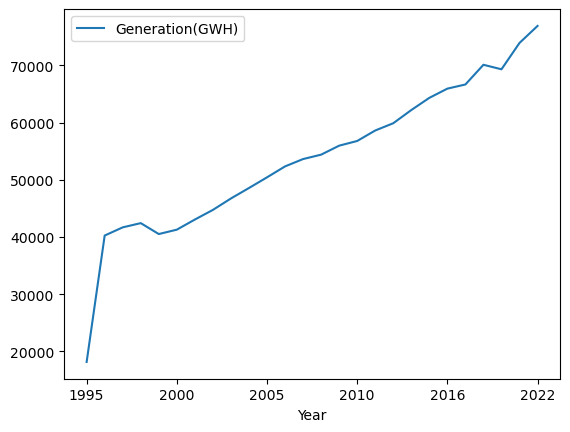

In [33]:
df["Year"]=years
df["Generation(GWH)"]=generation
df.plot(x="Year",y="Generation(GWH)")

# Modelo de regresion lineal para predecir valores de generacion futuros

In [ ]:

temp_reg-LinearRegression()
#df=df.loc[df["Year"] >1995]
temp_reg.fit(np.array(df["Year"]).reshape(-1,1),np.array(df["Generation(GWH)"]).reshape(-1,1))
prediccion= temp_reg.predict(np.array(2023).reshape(1,-1)).item()
#print(temp_reg.intercept_, temp_reg.coef_)
print(f"El valor que predice el modelo de regresion linea es {round(prediccion,2)} GhH de color rojo en la grafica,Mientras que el valor real es 80687.35 GWH (naranja)")
sns.scatterplot(x="Year",y="Generation(GWH)",data=df)
sns.scatterplot(x-[2023],y-prediccion,color-"red")
sns.scatterplot(x=[2023],y=80687.35)#dato verdadero sacado del dashboaard
plt.show()
print(f"la diferencia entre el valor predicho y el valor verdadero es: {round((80687.35-prediccion)/80687.35*100,2)} %")


# Union de los datos en un solo dataframe

### Normalizacion de las columnas de los dataframes

In [ ]:
def columnas(df):
    if 0 in df.columns:
        keys=df.columns.tolist()
        values=[unidecode(value) for value in df.columns.tolist()]
        dic=dict(zip(keys,values))
        dic
        dataframes1[1].rename(columns=dic,inplace=True)
    else:
        keys=df.columns.tolist()
        values=[unidecode(value) for value in df.columns.tolist()]
        dic=dict(zip(keys,values))
        dic
        df.rename(columns=dic,inplace=True)
for i in range(len(dataframes2)):
    columnas(dataframes2[i])

## Union de los dataframes

In [50]:
dataframes2=dataframes1[].copy()
common=[]
for i in dataframes2[0].columns:
    if i in dataframes2[1].columns:
        common.append(i)
union = dataframes2[0].merge(dataframes2[1], how="outer", on=common)
for i in range(len(dataframes2)):
    if i < 2:
        pass 
    else:
        common=[]
        for b in union.columns:
            if b in dataframes2[i].columns: 
                common.append(b)
        
        # Convertir la columna 'Fecha' en ambos DataFrames al tipo 'datetime64[ns]'
        union['Fecha'] = pd.to_datetime(union['Fecha'])
        dataframes2[i]['Fecha'] = pd.to_datetime(dataframes2[i]['Fecha'])
        
        # Fusionar los DataFrames
        union = union.merge(dataframes2[i], how="outer", on=common)

['Fecha',
 'Recurso',
 'Tipo Generacion',
 'Tipo Despacho',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

# Preparacion y limpieza de datos

#### Debido a que se realizara un analisis por tipo de generacion es importante la verificacion de estos datos

In [87]:
union["Tipo Generacion"].unique()

Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')

### Hay una discrpeanacia en la categorizacion de las plantas de energia solar por lo que se proecedera a corregirla

In [89]:
union["Tipo Generacion"]=union["Tipo Generacion"].replace("Solar","SOLAR")

In [90]:
merge=dataframes1[0].merge(dataframes1[1],how="outer",on=comonn)
merge.tail()


,Fecha,Recurso,Código Agente,Tipo Generacion,Tipo Despacho,0,1,2,3,4,...,15,16,17,18,19,20,21,22,23,Codigo Agente
42265,1996-12-31,CALDERAS,NaN,HIDRAULICA,DESPACHADO CENTRALMENTE,0,0,0,0,0,...,0,12900,19900,19900,20000,20100,0,0,0,ISSG
42266,1996-12-31,PROELECTRICA 1,NaN,TERMICA,DESPACHADO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PRLG
42267,1996-12-31,PROELECTRICA 2,NaN,TERMICA,DESPACHADO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PRLG
42268,1996-12-31,PRADO IV,NaN,HIDRAULICA,NO DESPACHADO CENTRALMENTE,5200,5200,5200,5000,5000,...,3900,4400,5200,5200,5300,5300,5300,5300,5400,TLMG
42269,1996-12-31,PRADO,NaN,HIDRAULICA,DESPACHADO CENTRALMENTE,29000,29000,29000,29000,29000,...,0,0,0,0,0,0,0,0,0,TLMG


In [ ]:
prueba=dataframes1[25]
if "Version" in prueba.columns:
    prueba=prueba.drop(columns=["Fecha","Version"])
else:
    prueba=prueba.drop(columns=["Fecha"])
prueba=prueba.groupby(prueba.columns[:prueba.columns.get_loc(0)].tolist()).sum()
prueba["Total"]=prueba[prueba.columns].sum(axis=1)
print(prueba["Total"].sum())
prueba.head()


In [87]:
hola=prueba2.columns[:prueba2.columns.get_loc("0")-1].tolist()
#hola
df2_copy=dataframes1[25]
prueba2=df2_copy.drop(columns=["Fecha","Version"])
prueba2.columns.get_loc("0")-1
hola=prueba2.columns[:prueba2.columns.get_loc("0")-1].tolist()
hola

['Recurso',
 'Código Recurso',
 'Tipo Generación',
 'Combustible',
 'Código Agente',
 'Tipo Despacho',
 'Es Menor']

In [94]:
modified_dataframes=[]
for dataframe in range(len(dataframes1)):
    #if dataframe ==2:
      #  break
    dfcopy=dataframes1[dataframe].copy()
    if "Version" in dfcopy.columns:
        dfcopy.drop(columns=["Fecha","Version"])
    else:
        dfcopy.drop(columns=["Fecha"])
    dfcopy=dfcopy.groupby(dfcopy.columns[:dfcopy.columns.get_loc("0")].tolist()).sum()
    dfcopy["Total"]=dfcopy[dfcopy.columns].sum(axis=1)
    #print(f'the GWH generation of {year} is {dfcopy["Total"].sum()/1000000}')
    modified_dataframes.append(dfcopy)

KeyError: '0'

In [69]:
dataframes1[2]

,Fecha,Recurso,Codigo Agente,Tipo Generacion,Tipo Despacho,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,1997-01-01,EL RIO 6,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997-01-01,EL RIO 7,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997-01-01,EL RIO 8,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997-01-01,LA UNION 1,ATLG,TERMICA,DESPACHO CENTRALMENTE,7800,7980,8030,8010,8000,...,5880,5360,5170,5340,7890,7930,7950,7960,7950,5340
4,1997-01-01,LA UNION 2,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28890,1997-12-31,PRADO IV,TLMG,HIDRAULICA,NO DESPACHO CENTRALMENTE,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
28891,1997-12-31,PRADO,TLMG,HIDRAULICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28892,1997-12-31,TASAJERO 1,TRMG,TERMICA,DESPACHO CENTRALMENTE,153000,153000,153000,153000,153000,...,153000,153000,153000,153000,153000,153000,153000,153000,153000,153000
28893,1997-12-31,TOPON 1,TSCG,TERMICA,DESPACHO CENTRALMENTE,103600,107280,107040,106560,106720,...,100720,100480,100480,102240,103840,104640,105120,105440,105520,105760


In [32]:
import os
import pandas as pd

# Ruta de la carpeta "data" dentro de tu proyecto
ruta_data = "D:\Documentos\IT\Github\Projects\Projects\Personal Projects\Generacion electrica en Colombia\Data"  # Cambia esta ruta por la ubicación de tu carpeta "data"

# Lista para almacenar los DataFrames
dataframes = []

# Itera sobre los archivos en la carpeta "data"

for archivo in os.listdir(ruta_data):
    if archivo.endswith(".xlsx"):  # Solo carga archivos Excel
        ruta_completa = os.path.join(ruta_data, archivo)
        df = pd.read_excel(ruta_completa,skiprows=2)
        dataframes.append(df)

# Ahora la lista "dataframes" contiene todos los DataFrames cargados desde los archivos Excel en la carpeta "data"


In [68]:
dataframes[2]

,1997-01-01 00:00:00,EL RIO 6,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0.1,0.2,0.3,0.4,...,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23
0,1997-01-01,EL RIO 7,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997-01-01,EL RIO 8,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997-01-01,LA UNION 1,ATLG,TERMICA,DESPACHO CENTRALMENTE,7800,7980,8030,8010,8000,...,5880,5360,5170,5340,7890,7930,7950,7960,7950,5340
3,1997-01-01,LA UNION 2,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997-01-01,LA UNION 3,ATLG,TERMICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28889,1997-12-31,PRADO IV,TLMG,HIDRAULICA,NO DESPACHO CENTRALMENTE,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
28890,1997-12-31,PRADO,TLMG,HIDRAULICA,DESPACHO CENTRALMENTE,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28891,1997-12-31,TASAJERO 1,TRMG,TERMICA,DESPACHO CENTRALMENTE,153000,153000,153000,153000,153000,...,153000,153000,153000,153000,153000,153000,153000,153000,153000,153000
28892,1997-12-31,TOPON 1,TSCG,TERMICA,DESPACHO CENTRALMENTE,103600,107280,107040,106560,106720,...,100720,100480,100480,102240,103840,104640,105120,105440,105520,105760
